In [32]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cat-and-dogs/dataset/test_set/dogs/dog.4329.jpg
/kaggle/input/cat-and-dogs/dataset/test_set/dogs/dog.4223.jpg
/kaggle/input/cat-and-dogs/dataset/test_set/dogs/dog.4253.jpg
/kaggle/input/cat-and-dogs/dataset/test_set/dogs/dog.4190.jpg
/kaggle/input/cat-and-dogs/dataset/test_set/dogs/dog.4354.jpg
/kaggle/input/cat-and-dogs/dataset/test_set/dogs/dog.4136.jpg
/kaggle/input/cat-and-dogs/dataset/test_set/dogs/dog.4226.jpg
/kaggle/input/cat-and-dogs/dataset/test_set/dogs/dog.4214.jpg
/kaggle/input/cat-and-dogs/dataset/test_set/dogs/dog.4888.jpg
/kaggle/input/cat-and-dogs/dataset/test_set/dogs/dog.4170.jpg
/kaggle/input/cat-and-dogs/dataset/test_set/dogs/dog.4323.jpg
/kaggle/input/cat-and-dogs/dataset/test_set/dogs/dog.4262.jpg
/kaggle/input/cat-and-dogs/dataset/test_set/dogs/dog.4788.jpg
/kaggle/input/cat-and-dogs/dataset/test_set/dogs/dog.4657.jpg
/kaggle/input/cat-and-dogs/dataset/test_set/dogs/dog.4387.jpg
/kaggle/input/cat-and-dogs/dataset/test_set/dogs/dog.4255.jpg
/kaggle/

# LOADING DATA

# IMPORT NECCESARY LABRARIES


In [28]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dropout,Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator,img_to_array,load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import seaborn as sns
import os
from sklearn.metrics import confusion_matrix

# DATA PREPARATION

# ImageDataGenerator

In [29]:
#apply various transformations like rescaling, rotation, shifting, etc.
train_datagen=ImageDataGenerator(rescale=1/255)
test_datagen=ImageDataGenerator(rescale=1/255)
train_path="../input/cat-and-dogs/dataset/training_set"
train_set=train_datagen.flow_from_directory(directory=train_path,target_size=(128,128),batch_size=32,color_mode="rgb",class_mode="binary")
test_path="../input/cat-and-dogs/dataset/test_set"
test_set=train_datagen.flow_from_directory(directory=train_path,target_size=(128,128),batch_size=32,color_mode="rgb",class_mode="binary")

Found 8000 images belonging to 2 classes.
Found 8000 images belonging to 2 classes.


# DATA PREPROCCESSING

In [30]:

train_shapes = []
test_shapes = []

train_images, _ = next(train_set)
test_images, _ = next(test_set)

train_shapes.append(train_images.shape[1:])
test_shapes.append(test_images.shape[1:])

print("Shape of train images:", train_shapes)
print("Shape of test images:", test_shapes)

Shape of train images: [(128, 128, 3)]
Shape of test images: [(128, 128, 3)]


# SAMPLE IMAGE FROM EACH CLASS

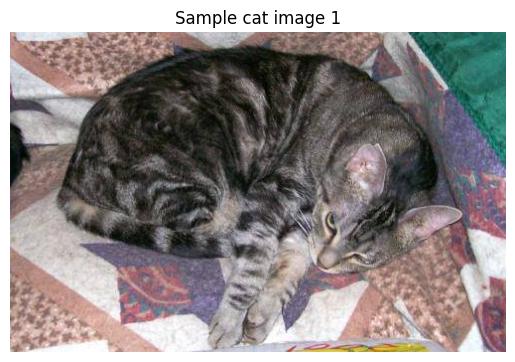

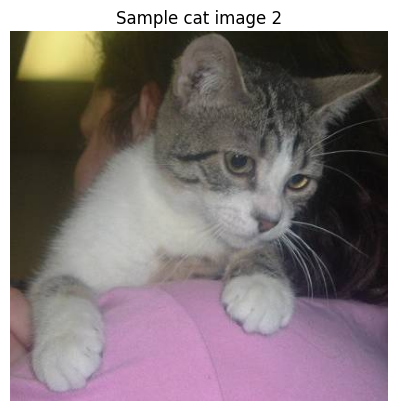

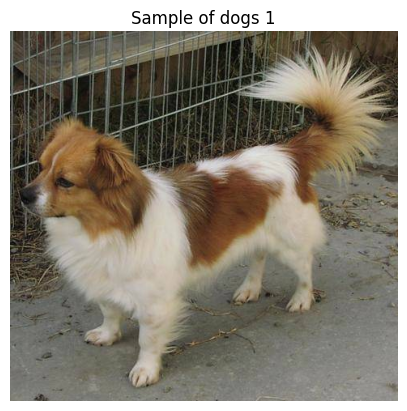

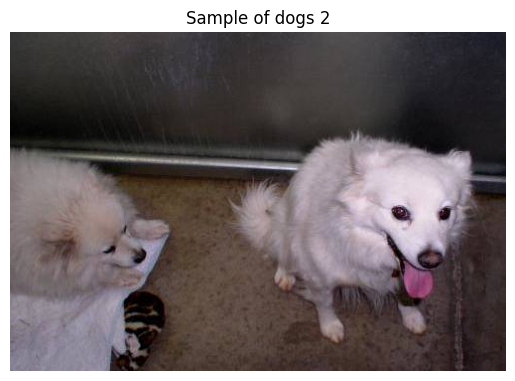

In [33]:


img=load_img(train_path+"/cats/cat.1028.jpg")
plt.imshow(img)
plt.axis("off")
plt.title("Sample cat image 1")
plt.show()
 
    

img=load_img(train_path+"/cats/cat.1068.jpg")
plt.imshow(img)
plt.axis("off")
plt.title("Sample cat image 2")
plt.show()
plt.figure()



img=load_img(train_path+"/dogs/dog.181.jpg")
plt.imshow(img)
plt.axis("off")
plt.title("Sample of dogs 1")
plt.show()



img=load_img(train_path+"/dogs/dog.188.jpg")
plt.imshow(img)
plt.axis("off")
plt.title("Sample of dogs 2")
plt.show()


# DATA VISULIZATION

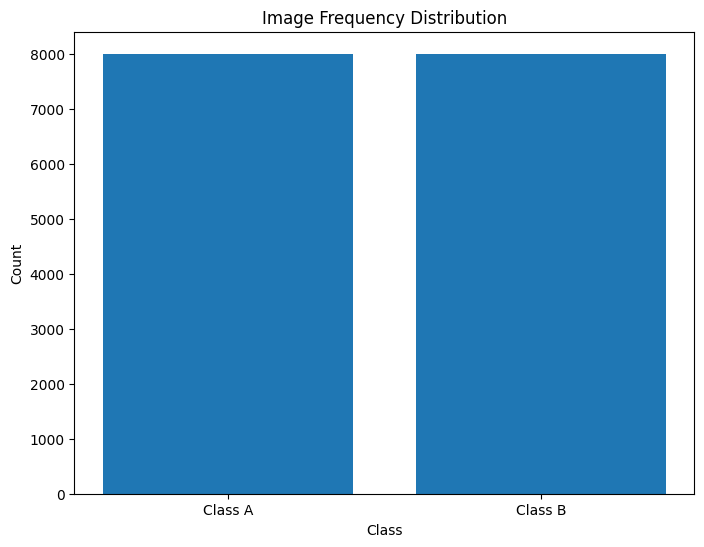

In [28]:

class_labels = ['Class A', 'Class B']
image_counts = [8000, 8000] 

 
plt.figure(figsize=(8, 6))
plt.bar(class_labels, image_counts)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Image Frequency Distribution')
plt.show()

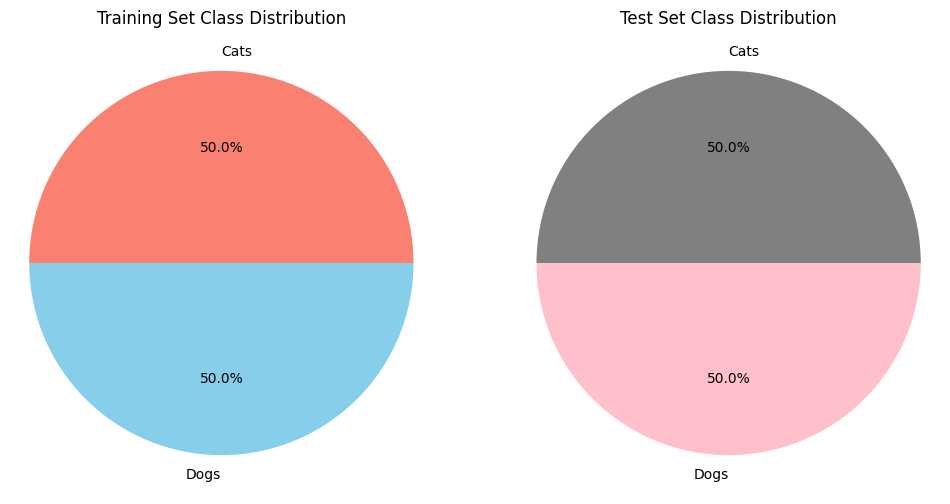

In [29]:

cat_path = os.path.join(train_path, "cats")
dog_path = os.path.join(train_path, "dogs")
cat_count = len(os.listdir(cat_path))
dog_count = len(os.listdir(dog_path))

cat_path2 = os.path.join(test_path, "cats")
dog_path2 = os.path.join(test_path, "dogs")
cat_count2 = len(os.listdir(cat_path2))
dog_count2 = len(os.listdir(dog_path2))

 
labels = ['Cats', 'Dogs']
sizes_train = [cat_count, dog_count]
sizes_test = [cat_count2, dog_count2]
colors = ['salmon', 'skyblue']
colors_test=['grey','pink']
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

 
axs[0].pie(sizes_train, labels=labels, autopct='%1.1f%%', colors=colors)
axs[0].set_title('Training Set Class Distribution')
axs[0].axis('equal')

 
axs[1].pie(sizes_test, labels=labels, autopct='%1.1f%%', colors=colors_test)
axs[1].set_title('Test Set Class Distribution')
axs[1].axis('equal')

plt.show()



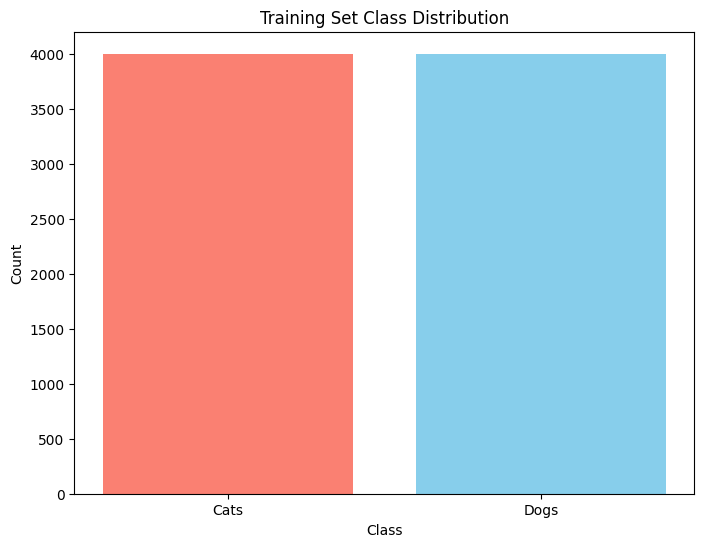

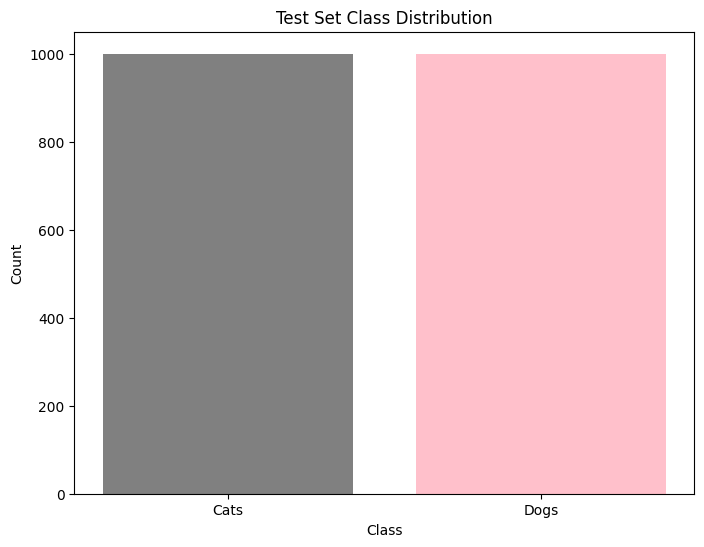

In [30]:
 
class_names_train = ['Cats', 'Dogs']
counts_train = [cat_count, dog_count]

plt.figure(figsize=(8, 6))
plt.bar(class_names_train, counts_train, color=['salmon', 'skyblue'])
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Training Set Class Distribution')
plt.show()

# For Test Set
class_names_test = ['Cats', 'Dogs']
counts_test = [cat_count2, dog_count2]

plt.figure(figsize=(8, 6))
plt.bar(class_names_test, counts_test, color=['grey', 'pink'])
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Test Set Class Distribution')
plt.show()

# CNN MODEL
# CREATION

In [31]:
model=Sequential()

# CNN LAYERS

# FIRST ARCHITECTURE

In [1]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
#VGG 13
 
model = Sequential([
 
        Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(128, 128, 3)),
        Conv2D(64, (3, 3), activation='relu', padding='same'),#to insure that the input size same as output size
    
        MaxPooling2D((2, 2), strides=(2, 2)),
    
        Conv2D(128, (3, 3), activation='relu', padding='same'),
        Conv2D(128, (3, 3), activation='relu', padding='same'),
    
        MaxPooling2D((2, 2), strides=(2, 2)),
    
        Conv2D(256, (3, 3), activation='relu', padding='same'),
        Conv2D(256, (3, 3), activation='relu', padding='same'),
        Conv2D(256, (3, 3), activation='relu', padding='same'),
    
        MaxPooling2D((2, 2), strides=(2, 2)),
    
        Conv2D(512, (3, 3), activation='relu', padding='same'),
        Conv2D(512, (3, 3), activation='relu', padding='same'),
        Conv2D(512, (3, 3), activation='relu', padding='same'),
    
        MaxPooling2D((2, 2), strides=(2, 2)),
    
        Conv2D(512, (3, 3), activation='relu', padding='same'),
        Conv2D(512, (3, 3), activation='relu', padding='same'),
        Conv2D(512, (3, 3), activation='relu', padding='same'),
    
        MaxPooling2D((2, 2), strides=(2, 2)),#step size the kernal moves two steps 
        Flatten(),
    
        Dense(4096, activation='relu'),# 4096 neuras 
        Dense(4096, activation='relu'),
        Dense(1, activation='sigmoid') # neuras only one between 1 and 0
    ])
   

 

# SECOND ARCHITECTURE

In [7]:
from tensorflow.keras.models import Sequential
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model2 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),#filters 32 and kernal size 3*3
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])


# THIRD ARCHITECTURE 


In [70]:
#defines a convolutional neural network (CNN) model using the Keras Sequential API(add layers)
#sequential model, which is a linear stack of layers
model3=Sequential()
#add layer with filter 64 width and hight (128,128)and RGB
model3.add(Conv2D(filters=64,kernel_size=(5,5),activation="relu",input_shape=(128,128,3)))
#maxpooling layer 
model3.add(MaxPool2D(pool_size=(2,2)))
model3.add(Conv2D(filters=32,kernel_size=(5,5),activation="relu"))

model3.add(MaxPool2D(pool_size=(2,2)))
#dropout layer
model3.add(Dropout(0.25))#rate
model3.add(Conv2D(filters=16,kernel_size=(5,5),activation="relu"))
model3.add(MaxPool2D(pool_size=(2,2)))
model3.add(Flatten()) #reshapes the 3D output from the previous layer into a 1D vector. 
#This is necessary to connect the convolutional layers to the fully connected layers.
model3.add(Dense(units=256,activation="relu"))#add fully connected layers.
model3.add(Dropout(0.5))#rate
model3.add(Dense(units=1,activation="sigmoid"))

 # MODEL COMPILATION

In [2]:
 
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [8]:
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [71]:
model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


# TRAIN THE MODEL
 

# USING EARLY STOPPING

In [3]:
from tensorflow.keras.callbacks import EarlyStopping

 
early_stopping = EarlyStopping(
    monitor='val_loss',    
    patience=5,           # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True,  # Restore weights to the epoch with the best value of the monitored metric
    verbose=1             # 1: Print messages about early stopping
)

In [62]:
history2 = model2.fit(train_set, epochs=20, batch_size=16,validation_data=test_set,callbacks=[early_stopping])

Epoch 1/20
250/250 [==============================] - 63s 251ms/step - loss: 0.0144 - accuracy: 0.9971 - val_loss: 0.0034 - val_accuracy: 1.0000
Epoch 2/20
250/250 [==============================] - 82s 328ms/step - loss: 0.0033 - accuracy: 0.9999 - val_loss: 0.0026 - val_accuracy: 0.9999
Epoch 3/20
250/250 [==============================] - 63s 251ms/step - loss: 0.0024 - accuracy: 0.9999 - val_loss: 0.0018 - val_accuracy: 1.0000
Epoch 4/20
250/250 [==============================] - 63s 250ms/step - loss: 0.0018 - accuracy: 0.9999 - val_loss: 0.0016 - val_accuracy: 1.0000
Epoch 5/20
250/250 [==============================] - 82s 329ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.0014 - val_accuracy: 1.0000
Epoch 6/20
250/250 [==============================] - 82s 327ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.0013 - val_accuracy: 1.0000
Epoch 7/20
250/250 [==============================] - 62s 249ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.0011 - val_ac

In [72]:
history3 = model3.fit(train_set, epochs=20, batch_size=16,validation_data=test_set,callbacks=[early_stopping])

Epoch 1/20
250/250 [==============================] - 195s 778ms/step - loss: 0.6946 - accuracy: 0.4999 - val_loss: 0.6931 - val_accuracy: 0.5016
Epoch 2/20
250/250 [==============================] - 198s 791ms/step - loss: 0.6927 - accuracy: 0.5060 - val_loss: 0.6862 - val_accuracy: 0.5383
Epoch 3/20
250/250 [==============================] - 195s 778ms/step - loss: 0.6868 - accuracy: 0.5411 - val_loss: 0.6783 - val_accuracy: 0.5633
Epoch 4/20
250/250 [==============================] - 195s 780ms/step - loss: 0.6755 - accuracy: 0.5638 - val_loss: 0.6656 - val_accuracy: 0.5850
Epoch 5/20
250/250 [==============================] - 196s 784ms/step - loss: 0.6673 - accuracy: 0.5805 - val_loss: 0.6507 - val_accuracy: 0.6076
Epoch 6/20
250/250 [==============================] - 195s 779ms/step - loss: 0.6551 - accuracy: 0.6101 - val_loss: 0.6504 - val_accuracy: 0.5981
Epoch 7/20
250/250 [==============================] - 195s 782ms/step - loss: 0.6396 - accuracy: 0.6284 - val_loss: 0.6118 -

In [8]:
history = model.fit(train_set, epochs=10, batch_size=16,validation_data=test_set,callbacks=[early_stopping])

Epoch 1/10
250/250 [==============================] - 3419s 14s/step - loss: 0.7013 - accuracy: 0.4955 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/10
250/250 [==============================] - 3424s 14s/step - loss: 0.6932 - accuracy: 0.4975 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/10
250/250 [==============================] - 3415s 14s/step - loss: 0.6932 - accuracy: 0.4967 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/10
250/250 [==============================] - 3427s 14s/step - loss: 0.6932 - accuracy: 0.4947 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/10
250/250 [==============================] - 3405s 14s/step - loss: 0.6932 - accuracy: 0.5013 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 6/10
250/250 [==============================] - 3427s 14s/step - loss: 0.6932 - accuracy: 0.4972 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 7/10
250/250 [==============================] - 3424s 14s/step - loss: 0.6932 - accuracy: 0.4963 - val_loss: 0.6931 - val_ac

# MODEL EVALUATION ON TRAIN AND TEST SET

In [9]:

test_loss, test_accuracy = model.evaluate(test_set)

250/250 [==============================] - 732s 3s/step - loss: 0.6931 - accuracy: 0.5000


In [65]:

test_loss2, test_accuracy2 = model2.evaluate(test_set)

250/250 [==============================] - 21s 85ms/step - loss: 0.0245 - accuracy: 0.9941


In [73]:

test_loss3, test_accuracy3 = model3.evaluate(test_set)

250/250 [==============================] - 42s 168ms/step - loss: 0.0804 - accuracy: 0.9776


In [79]:
train_loss2, train_accuracy2 = model2.evaluate(train_set)


250/250 [==============================] - 23s 92ms/step - loss: 0.0245 - accuracy: 0.9941


In [10]:
train_loss, train_accuracy = model.evaluate(train_set)

250/250 [==============================] - 732s 3s/step - loss: 0.6931 - accuracy: 0.5000


In [78]:
train_loss3, train_accuracy3 = model3.evaluate(train_set)

250/250 [==============================] - 43s 170ms/step - loss: 0.0804 - accuracy: 0.9776


# MODEL PREDICTIONS

In [11]:
#CALCLATE ONE BATCH TAKE HOW MANY SECONDS

test_images, test_labels = next(test_set)
predictions = model.predict(test_images)
predicted_labels = np.where(predictions > 0.5, 1, 0)

1/1 [==============================] - 3s 3s/step


In [66]:

test_images2, test_labels2 = next(test_set)
predictions2 = model2.predict(test_images2)
predicted_labels2 = np.where(predictions2 > 0.5, 1, 0)

1/1 [==============================] - 0s 69ms/step


In [74]:
test_images3, test_labels3 = next(test_set)
predictions3 = model3.predict(test_images2)
predicted_labels3 = np.where(predictions3 > 0.5, 1, 0)

1/1 [==============================] - 0s 223ms/step


# Calculate confusion matrix

Confusion Matrix:
[[ 0 19]
 [ 0 13]]


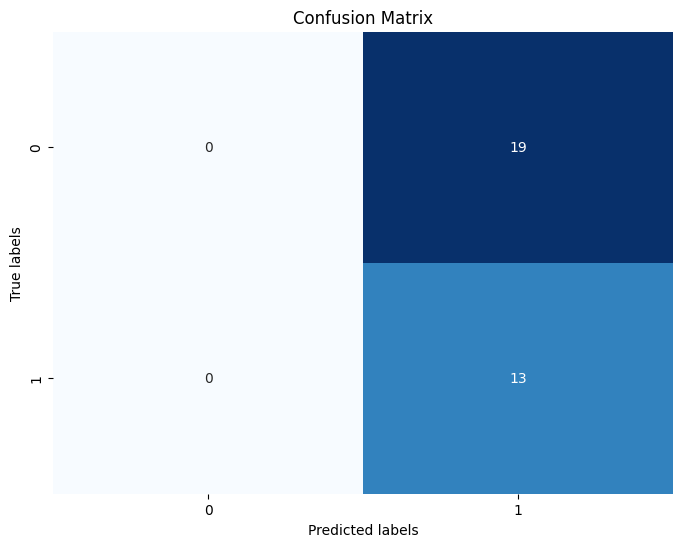

In [12]:
from sklearn.metrics import confusion_matrix


cm = confusion_matrix(test_labels, predicted_labels)
print("Confusion Matrix:")
print(cm)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

#TRUE POSITIVE  FALSE POSITIVE 
#FALSE NEGATIVE  TRUE NEGATIVE

Confusion Matrix:
[[16  0]
 [ 0 16]]


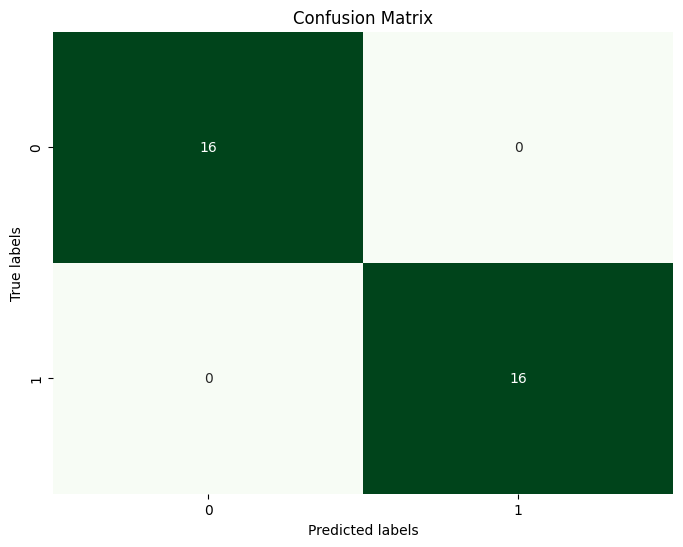

In [67]:
from sklearn.metrics import confusion_matrix


cm2 = confusion_matrix(test_labels2, predicted_labels2)
print("Confusion Matrix:")
print(cm2)

plt.figure(figsize=(8, 6))
sns.heatmap(cm2, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

#TRUE POSITIVE  FALSE POSITIVE 
#FALSE NEGATIVE  TRUE NEGATIVE

Confusion Matrix:
[[9 9]
 [7 7]]


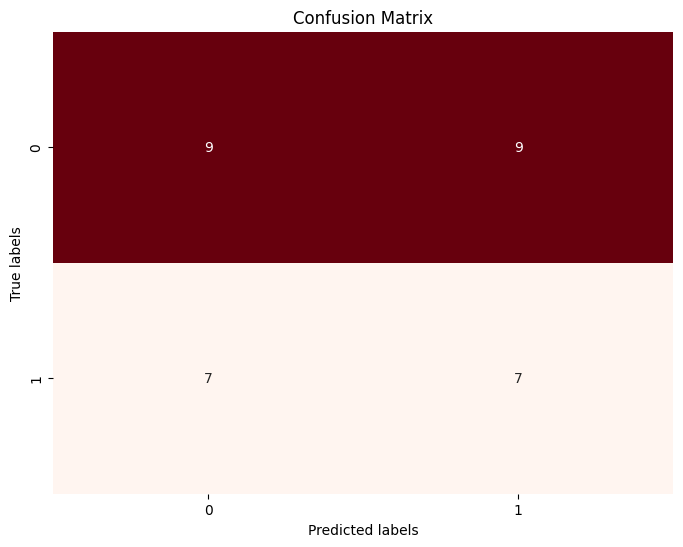

In [80]:
from sklearn.metrics import confusion_matrix


cm3 = confusion_matrix(test_labels3, predicted_labels3)
print("Confusion Matrix:")
print(cm3)

plt.figure(figsize=(8, 6))
sns.heatmap(cm3, annot=True, fmt='d', cmap='Reds', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()
#TRUE POSITIVE  FALSE POSITIVE 
#FALSE NEGATIVE  TRUE NEGATIVE

# PERFORMANCE VISULIZATION

In [59]:

plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

# Plot training & validation accuracy values

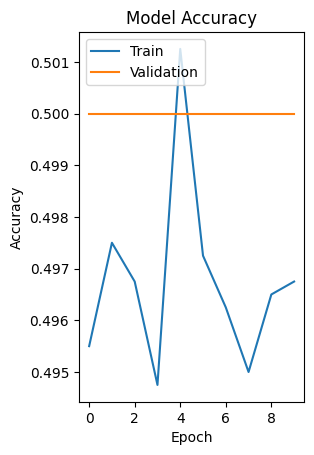

In [13]:

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

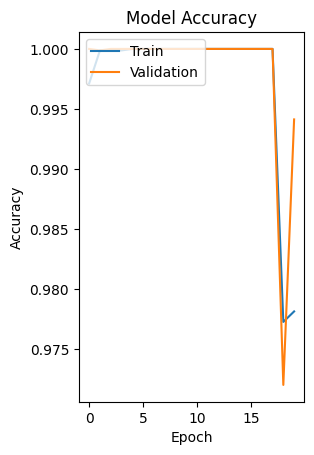

In [68]:
plt.subplot(1, 2, 1)
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

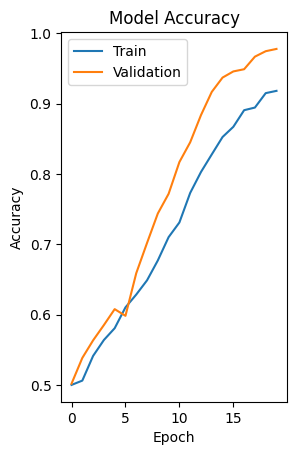

In [76]:
plt.subplot(1, 2, 1)
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values

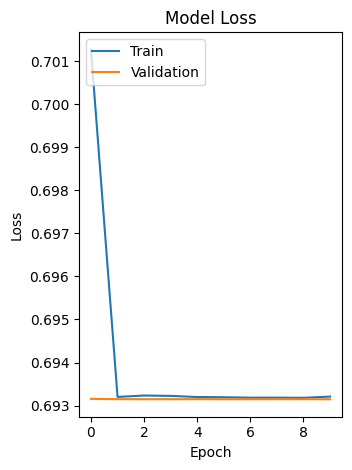

In [14]:

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

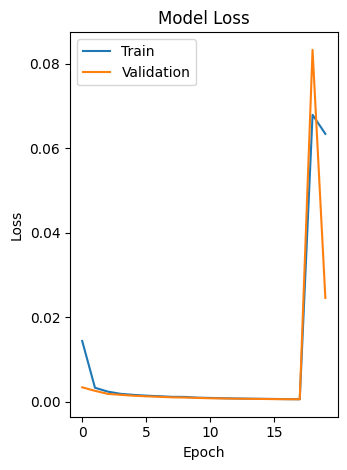

In [69]:
plt.subplot(1, 2, 2)
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

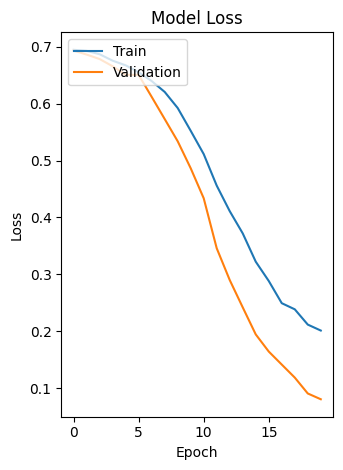

In [77]:
plt.subplot(1, 2, 2)
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

# LOAD UNEXPECTED IMAGES TO MAKE SURE THAT THE CLASSIFICATION RIGHT

# USING PIPELINE

In [21]:


from tensorflow.keras.preprocessing import image
import numpy as np
from sklearn.pipeline import Pipeline
 

def preprocess_image(img):
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    return img_array


In [22]:

from sklearn.base import BaseEstimator, TransformerMixin

# Define a custom transformer class for prediction
class PredictionTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, model):
        self.model = model

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        predictions = self.model.predict(X)
        return predictions

# Load and preprocess the image using a pipeline
img_path = '/kaggle/input/maielshamy2/Labrador_Retriever_portrait.jpg'

preprocess_pipeline = Pipeline([
    ('load_image', FunctionTransformer(image.load_img, kw_args={'target_size': (128, 128)})),
    ('preprocess', FunctionTransformer(preprocess_image)),
    ('predict', PredictionTransformer(model=model2))
])

In [23]:
predictions = preprocess_pipeline.transform(img_path)

if predictions[0][0] > 0.5:
    print("1")  # Predicted as dog
else:
    print("0")  # Predicted as cat

1/1 [==============================] - 0s 18ms/step
1


In [24]:
img_path = '/kaggle/input/maielshamy/FELV-cat.jpg'
preprocess_pipeline = Pipeline([
    ('load_image', FunctionTransformer(image.load_img, kw_args={'target_size': (128, 128)})),
    ('preprocess', FunctionTransformer(preprocess_image)),
    ('predict', PredictionTransformer(model=model2))
])

In [25]:
predictions = preprocess_pipeline.transform(img_path)

if predictions[0][0] > 0.5:
    print("1")  # Predicted as dog
else:
    print("0")  # Predicted as cat

1/1 [==============================] - 0s 18ms/step
0
